In [ ]:
!unzip /content/dataset.zip

Archive:  /content/dataset.zip
  inflating: data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg  
  inflating: data/train/ben_afflek/httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg  
  inflating: data/train/ben_afflek/httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg  
  inflating: data/train/ben_afflek/httptrwebimgacstanetcxbdddmediasnmediajpg.jpg  
  inflating: data/train/ben_afflek/httpwwwaceshowbizcomimagesphotobenaffleckjpg.jpg  
 

In [ ]:
pip install face_recognition

     |████████████████████████████████| 100.1 MB 23 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=3919912d8d41de9cebe81be6dd9a074e1be8da3af15fdadef71848292170ab69
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
import face_recognition
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os
from sklearn.multiclass import OneVsRestClassifier
import pickle

elton_john


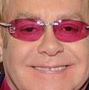

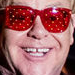

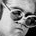

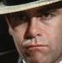

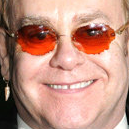

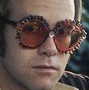

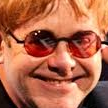

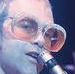

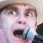

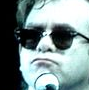

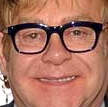

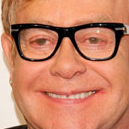

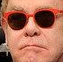

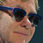

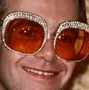

mindy_kaling


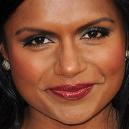

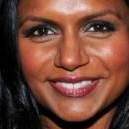

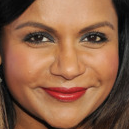

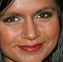

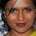

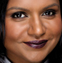

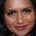

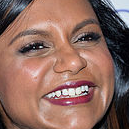

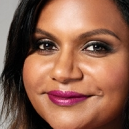

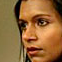

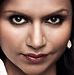

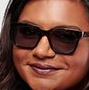

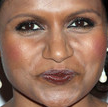

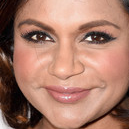

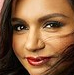

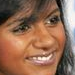

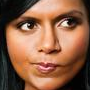

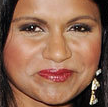

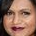

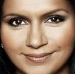

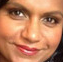

ben_afflek


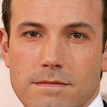

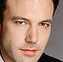

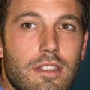

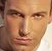

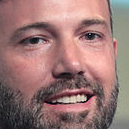

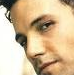

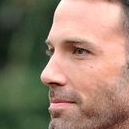

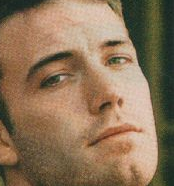

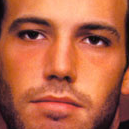

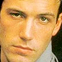

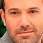

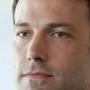

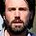

jerry_seinfeld


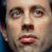

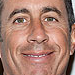

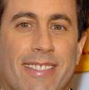

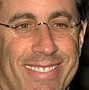

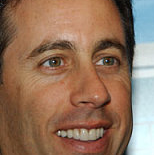

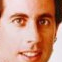

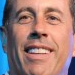

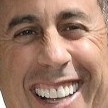

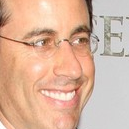

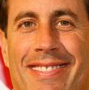

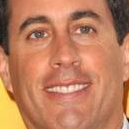

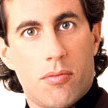

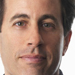

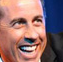

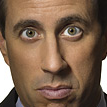

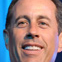

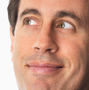

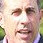

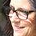

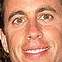

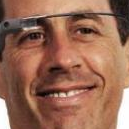

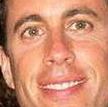

madonna


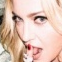

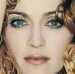

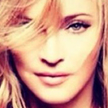

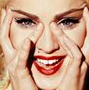

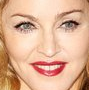

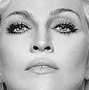

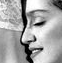

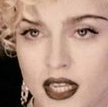

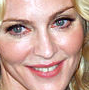

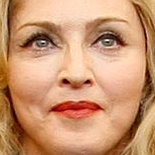

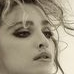

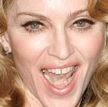

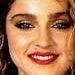

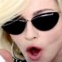

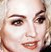

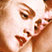

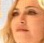

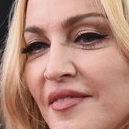

In [ ]:
train_dir= '/content/train'
x=[]
y=[]
index=0
classes= {}
for folders in os.listdir(train_dir):
  classes[index]= folders
  index= index+1
  print(folders)
  folders_dir= train_dir+ "/" + folders
  for folder in os.listdir(folders_dir):
    image_path= folders_dir + "/" + folder
    img= cv2.imread(image_path)
    boxes= face_recognition.face_locations(img)
    for i in boxes:
      top, right, bottom, left= i
      face_img= img[top: bottom, left:right]
      cv2_imshow(face_img)
      try:
        face_img= cv2.resize(face_img, (256, 256))
        encodings= face_recognition.face_encodings(face_img)[0]
        x.append(encodings)
        y.append(index)
      except:
        continue

In [ ]:
print(classes)
print(len(x))

{0: 'elton_john', 1: 'mindy_kaling', 2: 'ben_afflek', 3: 'jerry_seinfeld', 4: 'madonna'}
78


In [ ]:
import json
with open('face-class.json', 'w') as f:
    json.dump(classes, f)

In [ ]:
model= OneVsRestClassifier(SVC(kernel= 'linear', probability= True, verbose= True))
model.fit(x, y)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

OneVsRestClassifier(estimator=SVC(kernel='linear', probability=True,
                                  verbose=True))

In [ ]:
pickle.dump(model, open('final-model.pickle', 'wb'))

In [ ]:
class_list = list(classes.keys())
print(len(class_list))
print(class_list)

5
[0, 1, 2, 3, 4]


In [ ]:
!unzip facedata.zip

Archive:  facedata.zip
   creating: facedata/ben_afflek/
  inflating: facedata/ben_afflek/httpcsvkmeuaeccjpg.jpg  
  inflating: facedata/ben_afflek/httpimgclosermagfrvarclosermagstorageimagesactupeoplebiodestarsmadonnamadonnafreFRmadonnaexactxljpg.jpg  
  inflating: facedata/ben_afflek/httpmediavoguecomrwblondesdarkbrowsmadonnajpg.jpg  
  inflating: facedata/ben_afflek/httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg  
  inflating: facedata/ben_afflek/httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg  
  inflating: facedata/ben_afflek/httpwwwrumenewscomwpcontentuploadsbenafflekxpng.jpg  
   creating: facedata/jerry_seinfeld/
  inflating: facedata/jerry_seinfeld/httpimagescontactmusiccomnewsimagesjerryseinfeldjpg.jpg  
  inflating: facedata/jerry_seinfeld/httpsticketmnettmenusdbimagesajpg.jpg  
   creating: facedata/mindy_kaling/
  inflating: facedata/mindy_kaling/httpimagescontactmusiccomnewsimagesjerryseinfeldjpg.jpg  
  

In [ ]:
test_dir= "/content/facedata"
test_enc= []
for folders in os.listdir(test_dir):
  print(folders)
  folders_dir= test_dir+ "/" + folders
  for folder in os.listdir(folders_dir):
    image_path= folders_dir + "/" + folder
    img= cv2.imread(image_path)
    try:
      encodings= face_recognition.face_encodings(img)[0]
      encodings= np.asarray(encodings)
      test_enc.append(encodings)
    except:
      continue

mindy_kaling
ben_afflek
jerry_seinfeld


In [ ]:
probabilities= model.predict_proba(test_enc)
for index, predictions in enumerate(probabilities):
  if np.max(predictions) > 0.6:
    print(classes[class_list[np.argmax(predictions)]], np.max(predictions))
  else:
    print("Not found")

mindy_kaling 0.9728521564880874
mindy_kaling 0.9770085925652366
mindy_kaling 0.8951582813411249
mindy_kaling 0.8615203389706395
jerry_seinfeld 0.9497264221079261
ben_afflek 0.9501677819788727
ben_afflek 0.9070726806470741
madonna 0.960676465397934
ben_afflek 0.9422258409980571
madonna 0.9648612798903858
ben_afflek 0.8950331438375899
jerry_seinfeld 0.9497264221079261
jerry_seinfeld 0.9350885483429967
